<a href="https://colab.research.google.com/github/toupasana/Unsupervised-ML/blob/main/Copy_of_ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

<b>Exploratory Data Analysis on Zomato Dataset</b><br>
 – Loading the Dataset <br>
 – Data Columns<br>
 – Duplicated function<br>
 – Information of data<br>
 – Reading column names<br>
 – Changing the column names<br>
 – Transformation in Data Type<br>
 – Changing cost to float<br>
 – Reading rate of dataset<br>
 – Removing from rate<br>
 – Adjust the column<br>
 – Encode the input variation<br>
 – Co-relation between different variations<br>
 – Column /name<br>
 – Data Visualization<br>
 – Table Booking Rate vs Rate<br>
 – Location<br>
 – Location vs Rating<br>
 – Restaurant type<br>
 – Gaussian rest type and rating<br>
 – Type of Service <br>
 – Type and Rating<br>
 – Cost of restaurant<br>
 – No.of restaurant in the location<br>
 – Type of Restaurant<br>
 – Most famous restaurant chains <br>


In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
#importing all the libraries which are requied to do EDA and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('dark_background')

These are the libraries which I am using for EDA and Visualization.

* Pandas : a software library written for the Python programming language for data manipulation and analysis

* Numpy : a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

* Matplotlib : a plotting library for the Python programming language and its numerical mathematics extension NumPy.

* Seaborn : a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

### Loading the Dataset

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
restaurant = pd.read_csv("/content/drive/MyDrive/Capstone Project/Unsupervised Machine Learning /Zomato Restaurant names and Metadata.csv")
restaurant.head()


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [63]:
restaurant.shape

(105, 6)

In [64]:
restaurant.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

We can see that there are 105 rows of Data and 6 Columns

In [65]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


When we looked into the information of the data we can see some values are missing in different columns Collection,timing(for one)



In [66]:
#Checking the nullm values in dataset
restaurant.isna().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [67]:
[features for features in restaurant.columns if restaurant[features].isnull().sum()>0]  

['Collections', 'Timings']

In [68]:
# Lets find the total number of null values

restaurant.isnull().sum().sum()
print('The total number of null values in the whole dataset is {}.'.format(restaurant.isnull().sum().sum()))

The total number of null values in the whole dataset is 55.


In [69]:
#print('Convert the 'Cost' column, deleting the comma and changing the data type into 'int64'')
restaurant['Cost'] = restaurant['Cost'].str.replace(",","").astype('int64')

In [130]:
#restaurant['Timings'].unique()

array(['12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)', '11 AM to 11 PM',
       '11:30 AM to 4:30 PM, 6:30 PM to 11 PM', '12 Noon to 2 AM',
       '12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)',
       '12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30PM (Mon, Tue, Wed, Thu, Sun), 12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 12Midnight (Fri-Sat)',
       '7 AM to 10 PM', '12 Noon to 12 Midnight',
       '10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri-Sun)',
       '12 Noon to 3:30 PM, 7 PM to 10:30 PM',
       '12 Noon to 3:30 PM, 6:30 PM to 11:30 PM', '11:30 AM to 1 AM',
       '12noon to 12midnight (Mon-Sun)',
       '12 Noon to 4:30 PM, 6:30 PM to 11:30 PM', '12 Noon to 10:30 PM',
       '12 Noon to 11 PM', '12:30 PM to 10 PM (Tue-Sun), Mon Closed',
       '11:30 AM to 3 PM, 7 PM to 11 PM',
       '11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11am to 12midnight (Fri-Sat)',
       '10 AM to 5 AM',
       '12 Noon to 12 Midnight (Mon-Thu, Sun), 12 Noon to 1 AM (Fri-S

In [70]:
#plot the null values
#sns.heatmap(restaurant.isnull(),yticklabels=False, cbar=False,cmap='viridis')
plt.show()

In [71]:
#Check the all data info
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


In [72]:
# Examine Statistics
restaurant.describe()

,Cost
count,105.000000
mean,861.428571
std,510.149730
min,150.000000
25%,500.000000
50%,700.000000
75%,1200.000000
max,2800.000000


Review Dataset Preprosesing

In [73]:
review =pd.read_csv("/content/drive/MyDrive/Capstone Project/Unsupervised Machine Learning /Zomato Restaurant reviews.csv")
review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [74]:
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [75]:
review.shape

(10000, 7)

In [76]:
print('The total number of null values in the whole dataset is {}.'.format(review.isnull().sum().sum()))

The total number of null values in the whole dataset is 197.


In [77]:
[features for features in review.columns if review[features].isnull().sum()>0] 

['Reviewer', 'Review', 'Rating', 'Metadata', 'Time']

In [78]:
review.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

As we can see, there are few missing values compared to the shape of the dataset so I decide to drop them all because there isn't a big loss

In [79]:
#Droping the null value data
#review.dropna(inplace = True)
#review.info()

In [80]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [81]:
#Check the review column
review['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

rating of the restaurent out of 5.

So, We can see in the above data that there are so many unique elements in the column "Rating".

And also we can observe Unique elements "Like" in the column.

For that we will now write a function to change those values to 'NAN' and also transform all the ratings into float.

review

Like is only 1, we can drop it to convert Rating to float dType.



In [82]:
review=review[review['Rating']!='Like']

In [83]:

review['Rating'] = review['Rating'].astype('float64')


In [85]:
review['Review'].unique()

array(['The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.',
       'Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service',
       'A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.',
       ...,
       'Bad rating is mainly because of "Chicken Bone found in Veg food" and is not acceptable for a Vegetarian.\n\nTo satiate Cravings for chinese food we headed to Chinese Pavilion and there was also a voucher available in Little app for Luncheon tray for Rs 310 (Veg) [well do not bother for the voucher as the price for Veg Luncheon tray is Rs 275/- + taxes in the restaurant itself).\n\nThe am

In [86]:
review['Reviews'],review['Followers']=review['Metadata'].str.split(',').str
review['Reviews'] = pd.to_numeric(review['Reviews'].str.split(' ').str[0])
review['Followers'] = pd.to_numeric(review['Followers'].str.split(' ').str[1])

#review= review.drop(['Metadata'], axis =1)

In [87]:
review['Time'].unique()

array(['5/25/2019 15:54', '5/25/2019 14:20', '5/24/2019 22:54', ...,
       '6/3/2016 10:37', '5/31/2016 17:22', '5/31/2016 16:41'],
      dtype=object)

In [88]:
#Convertint  the 'Time' variable into year and hours
review['Time']=pd.to_datetime(review['Time'])
review['Year'] = pd.DatetimeIndex(review['Time']).year
review['Hour'] = pd.DatetimeIndex(review['Time']).hour

In [89]:
#we can imput the missing values
#imputing the columns ‘Rating’ with the mean of the respective column values because it is the best way to impute the numerica column.
review.Rating.isnull().sum()

38

In [90]:
review['Rating']=review['Rating'].replace(np.NaN,review['Rating'].mean())
review['Rating']

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
9995    3.0
9996    4.5
9997    1.5
9998    4.0
9999    3.5
Name: Rating, Length: 9999, dtype: float64

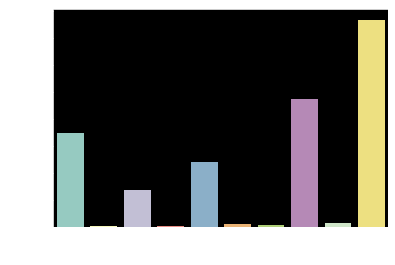

In [91]:
sns.countplot(review.Rating)
plt.show()

In [92]:
review.Year.unique()

array([2019., 2018., 2017., 2016.,   nan])

In [93]:
review.Year.isnull().sum()

38

In [94]:
review['Year']=review['Year'].replace(np.NaN,review['Year'].median())
review['Year'].unique()

array([2019., 2018., 2017., 2016.])

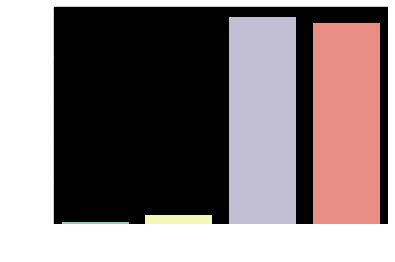

In [95]:
sns.countplot(review.Year)

plt.show()

In [96]:
review.Hour.unique()

array([15., 14., 22., 21.,  1., 23., 20., 19., 10.,  5., 12.,  0.,  7.,
       18.,  3., 16.,  8., 11., 13., 17.,  2.,  9.,  6.,  4., nan])

In [97]:
review['Hour']=review['Hour'].replace(np.NaN,review['Hour'].median())
review['Hour'].unique()

array([15., 14., 22., 21.,  1., 23., 20., 19., 10.,  5., 12.,  0.,  7.,
       18.,  3., 16.,  8., 11., 13., 17.,  2.,  9.,  6.,  4.])

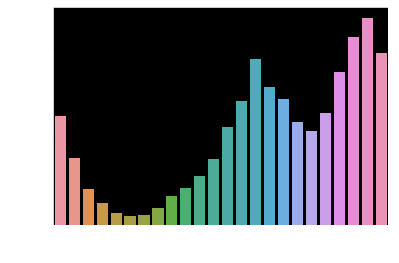

In [98]:
sns.countplot(review.Hour)

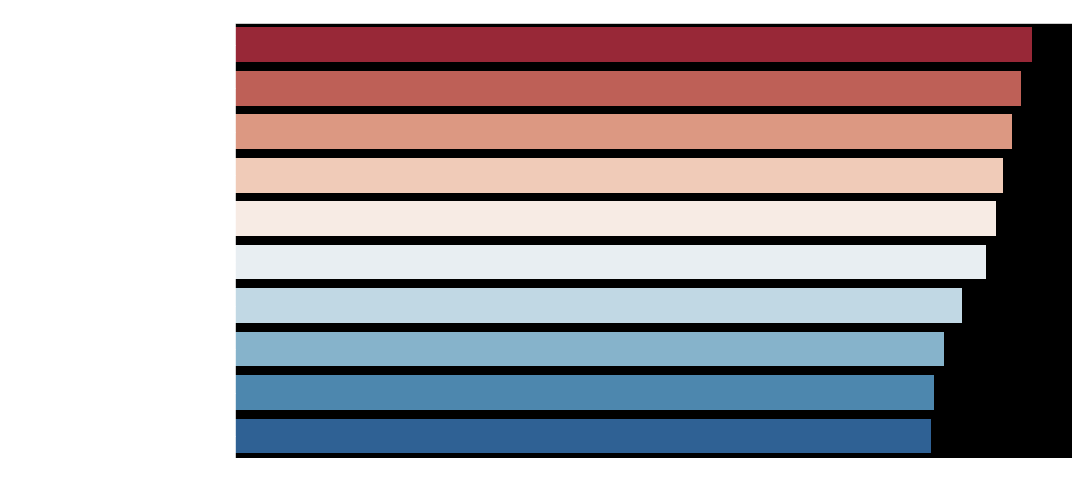

In [102]:
rating_df = review.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()
rating_df = rating_df.sort_values(by='Rating', ascending=False).head(10)

plt.figure(figsize=(15,8))
sns.barplot(data=rating_df, x='Rating', y='Restaurant', palette='RdBu')
plt.title('Top Rated 10 Restaurants')
plt.show()

In [104]:
#Checking the top 10 listed restaurants in 2019.

year_avg_rating = review.groupby(['Restaurant', 'Year'])['Rating'].mean().sort_values(ascending = False).reset_index()
twenty_ninteen = year_avg_rating[year_avg_rating.Year == 2019].head(10)
twenty_ninteen

,Restaurant,Year,Rating
0,AB's - Absolute Barbecues,2019.0,4.880000
1,B-Dubs,2019.0,4.810000
2,"3B's - Buddies, Bar & Barbecue",2019.0,4.760000
3,Paradise,2019.0,4.700000
4,Flechazo,2019.0,4.660000
5,Cascade - Radisson Hyderabad Hitec City,2019.0,4.641509
7,The Indi Grill,2019.0,4.600000
8,Karachi Bakery,2019.0,4.538462
10,Zega - Sheraton Hyderabad Hotel,2019.0,4.409091
12,Over The Moon Brew Company,2019.0,4.340000


Above listed restaurants are top 10 restaurants in 2019.


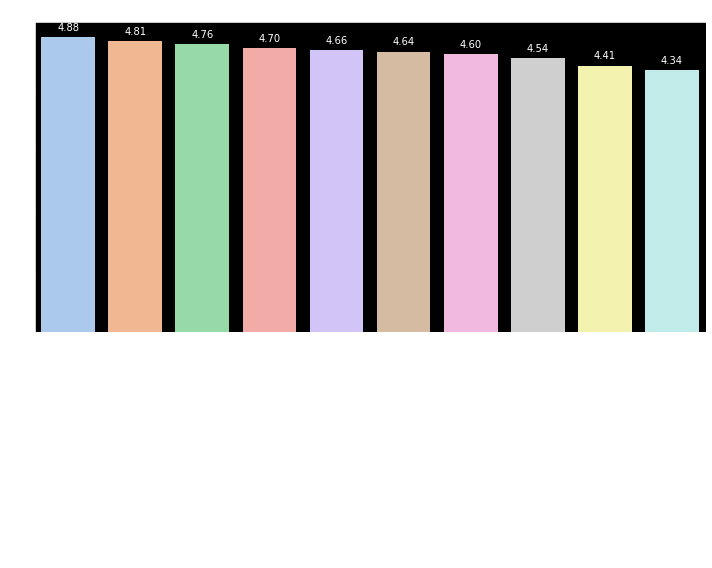

In [108]:
plt.figure(figsize=(10, 8))
plot = sns.barplot(twenty_ninteen.Restaurant, twenty_ninteen.Rating, palette='pastel')
for p in plot.patches:
    plt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                   p.get_height()), ha = 'center', va = 'center', 
                   xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Rating')
plt.xlabel('Restaurant_Name')
plt.xticks(rotation=90)
plt.title('Top 10 restaurants in 2019')
plt.tight_layout()

In [ ]:
# Checking the Top 10 restaurants in 2018.

In [109]:
twenty_seventeen = year_avg_rating[year_avg_rating.Year == 2017].head(10)
twenty_seventeen

,Restaurant,Year,Rating
16,KS Bakers,2017.0,4.254717
40,Labonel,2017.0,3.897436
43,Chinese Pavilion,2017.0,3.883333
49,Collage - Hyatt Hyderabad Gachibowli,2017.0,3.833333
117,Dunkin' Donuts,2017.0,3.423077
119,Al Saba Restaurant,2017.0,3.388889
121,T Grill,2017.0,3.382353
123,Cascade - Radisson Hyderabad Hitec City,2017.0,3.357143


There are total 8 Restaurants which gets the rating in 2017.

In [110]:
twenty_sixteen = year_avg_rating[year_avg_rating.Year == 2016].head(10)
twenty_sixteen

,Restaurant,Year,Rating
34,Labonel,2016.0,3.970588
36,Chinese Pavilion,2016.0,3.961538


Labonel and Chinese Pavilion only got the rating in the year 2016.

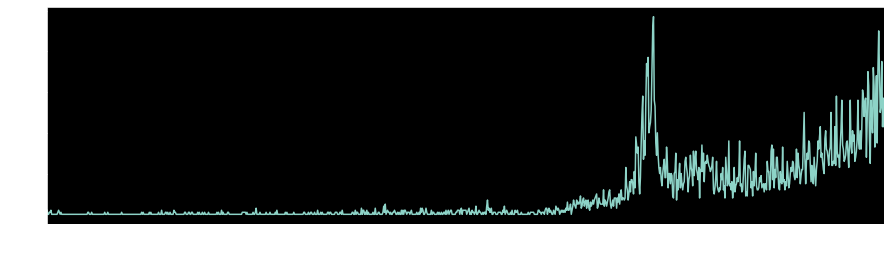

In [111]:
plt.figure(figsize=(15, 4))
review.resample('1D',on='Time')['Reviews'].size().plot.line()
plt.xlabel('Date')
plt.ylabel('No. of Reviews')
plt.show()

In [112]:
cuisine_list = restaurant.Cuisines.str.split(', ') 
cuis_list = {} 
for names in cuisine_list: 
    for name in names:
        if (name in cuis_list):
            cuis_list[name]+=1
        else:  
            cuis_list[name]=1 
cuis_df = pd.DataFrame(cuis_list.values(),index = cuis_list.keys(),columns = {'Counts of Restaurants'}) 
cuis_df.sort_values(by = 'Counts of Restaurants',ascending = False,inplace = True) 
top_10_cuis = cuis_df[0:10]
print('The Top 10 Cuisines are:\n',top_10_cuis)

The Top 10 Cuisines are:
               Counts of Restaurants
North Indian                     61
Chinese                          43
Continental                      21
Biryani                          16
Fast Food                        15
Asian                            15
Italian                          14
Desserts                         13
South Indian                      9
Bakery                            7


In [113]:
#Find the Top 10 cuisines
cuis_df.reset_index(inplace=True)
cuis_df.head()

,index,Counts of Restaurants
0,North Indian,61
1,Chinese,43
2,Continental,21
3,Biryani,16
4,Fast Food,15


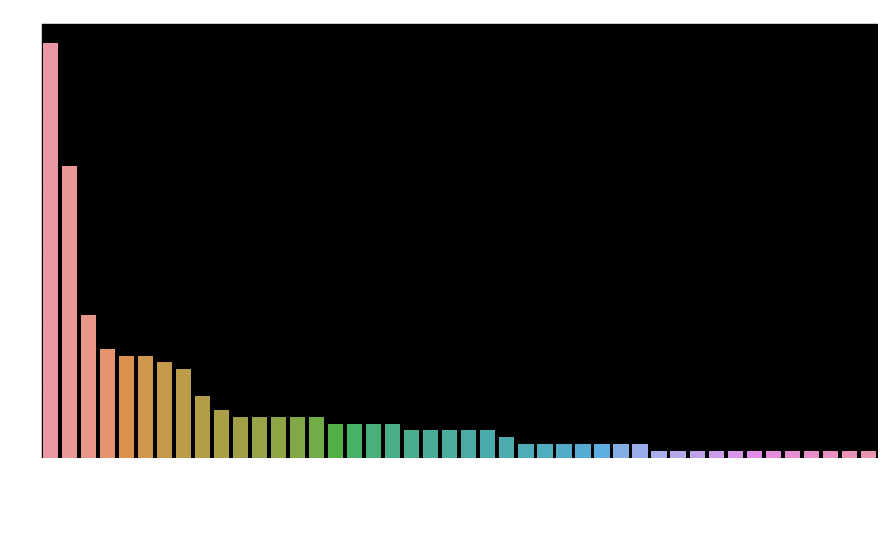

In [115]:
#Plot the Cuisions
fig = plt.figure(figsize=[15,8])
sns.barplot(data=cuis_df, x='index', y= 'Counts of Restaurants')
plt.xlabel('Cuisines')
plt.xticks(rotation=90)
plt.ylabel('Cuisine available at Number of Restaurants')
plt.title('Most popular cuisines at Restaurants in Hyderabad')
plt.show()

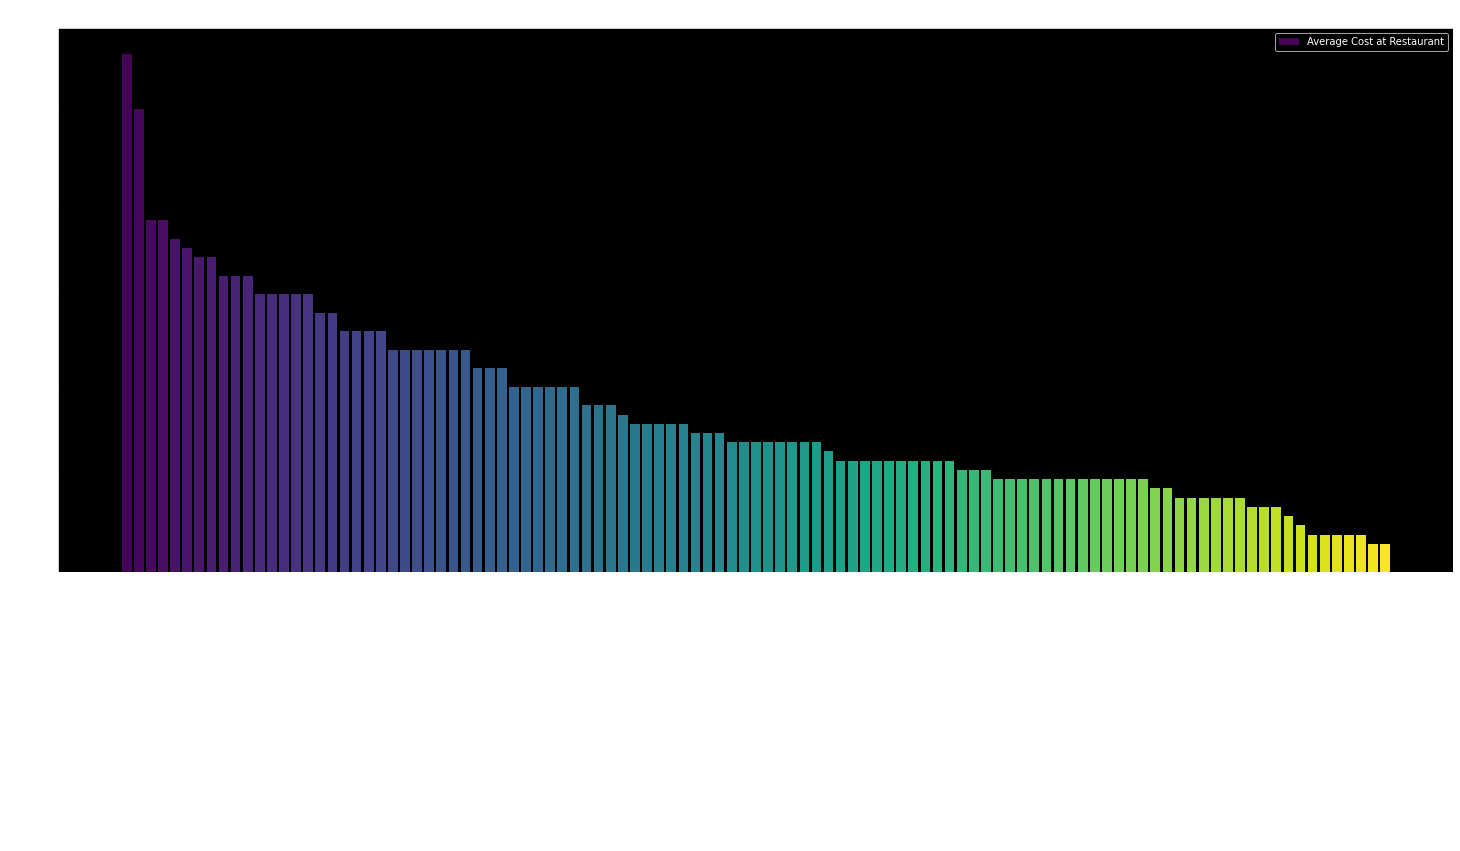

In [118]:
restaurants_cost=restaurant.groupby('Name')['Cost'].mean().reset_index(name='Cost')
restaurants_cost.sort_values(by='Cost',ascending=False,inplace=True)
plt.figure(figsize=(25,10))
plt.bar(restaurants_cost['Name'],restaurants_cost['Cost'], color = sns.color_palette("viridis", len(restaurants_cost['Name'])))
plt.xlabel('Restaurants',size=15)
plt.xticks(rotation=90)
plt.ylabel('Average Cost',size=15)
plt.title('Overall Cost Summary of Restaurants',size=20)
plt.legend(['Average Cost at Restaurant'])
plt.show()

In [119]:
#Checking the how the resturent is costly 
restaurants_cost.sort_values(by='Cost',ascending=False,inplace=True)
restaurants_cost.head(10)

,Name,Cost
23,Collage - Hyatt Hyderabad Gachibowli,2800.0
35,Feast - Sheraton Hyderabad Hotel,2500.0
0,10 Downing Street,1900.0
48,Jonathan's Kitchen - Holiday Inn Express & Suites,1900.0
20,Cascade - Radisson Hyderabad Hitec City,1800.0
102,Zega - Sheraton Hyderabad Hotel,1750.0
74,Republic Of Noodles - Lemon Tree Hotel,1700.0
60,Mazzo - Marriott Executive Apartments,1700.0
14,Barbeque Nation,1600.0
9,Arena Eleven,1600.0


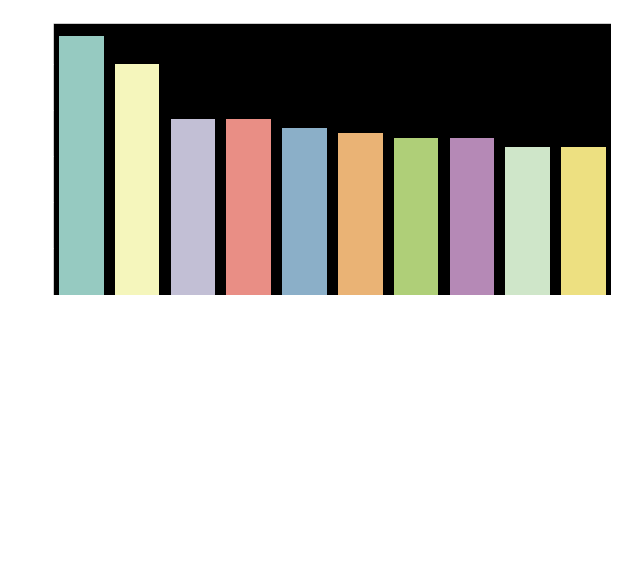

In [124]:
#Ploting the top 10 costly restutent
fig = plt.figure(figsize=[10,5])
sns.barplot(data=restaurants_cost.head(10), x='Name', y= 'Cost')
plt.xlabel('Restaurants')
plt.xticks(rotation=90)
plt.ylabel('Cost')
plt.title('10 Most expensive Restaurants')
plt.show()

In [127]:
#Checking the 10 cheapest resturent
restaurants_cost.tail(10)

,Name,Cost
93,The Old Madras Baking Company,350.0
79,Shah Ghouse Spl Shawarma,300.0
100,Wich Please,250.0
83,Sweet Basket,200.0
11,Asian Meal Box,200.0
62,Momos Delight,200.0
43,Hunger Maggi Point,200.0
50,KS Bakers,200.0
7,Amul,150.0
61,Mohammedia Shawarma,150.0


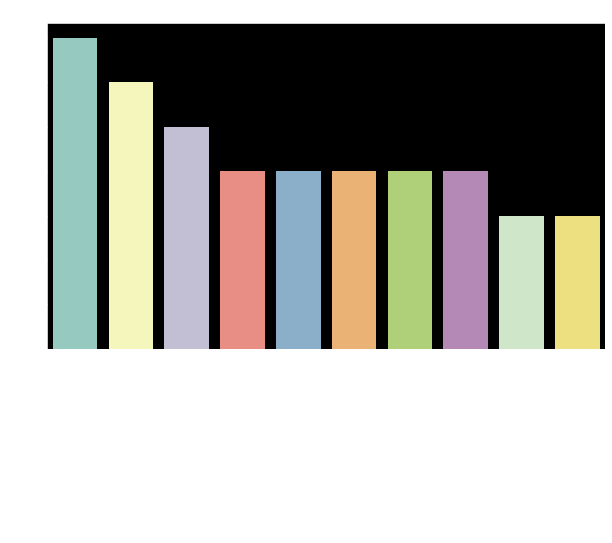

In [129]:
fig = plt.figure(figsize=[10,6])
sns.barplot(data=restaurants_cost.tail(10), x='Name', y= 'Cost')
plt.xlabel('Restaurants')
plt.xticks(rotation=90)
plt.ylabel('Cost')
plt.title('10 Most cheapest Restaurants')
plt.show()

In [133]:
zomato_df=review.merge(restaurant, left_on='Restaurant', right_on='Name').drop('Name',axis=1)
zomato_df.head(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviews,Followers,Year,Hour,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,1.0,2.0,2019.0,15.0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,3.0,2.0,2019.0,14.0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
